In [2]:
import torch

from gfos.loss import MultiElementRankLoss

In [3]:
margin_loss = torch.nn.MarginRankingLoss(margin=0.5)

def test_mle(num_configs, nsample):
    criterion = MultiElementRankLoss(number_permutations=nsample, margin=0.5)
    outputs = torch.randn(num_configs)
    runtime = torch.randn(num_configs)
    sampled_loss = criterion(outputs, runtime)
    
    permuted_runtime, permutation = torch.sort(runtime)
    labels = 2 * ((runtime - permuted_runtime) > 0) - 1
    permuted_output = outputs[permutation]
    true_loss = margin_loss(
        outputs.view(-1, 1),
        permuted_output.view(-1, 1),
        labels.view(-1, 1),
    )
    
    loss_diff = torch.abs(sampled_loss - true_loss)
    
    return loss_diff

In [8]:
nsample = 100

loss_diff = [test_mle(num_configs, nsample) for num_configs in range(1, 512)]

In [6]:
import matplotlib.pyplot as plt

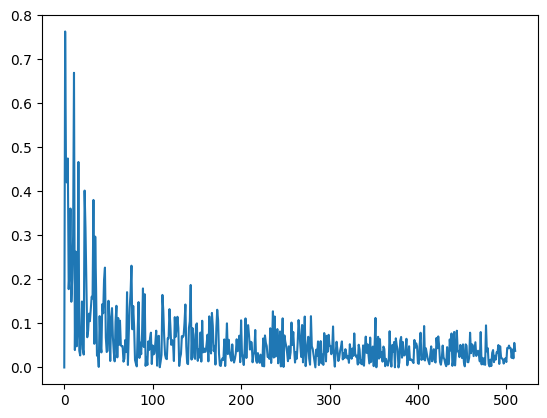

In [9]:
plt.plot(loss_diff)

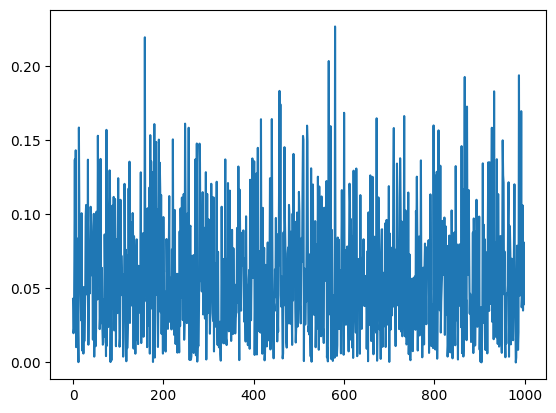

In [14]:
num_configs = 128
loss_diff = [test_mle(num_configs, nsample) for nsample in range(1, 1000)]
plt.plot(loss_diff)